<a href="https://colab.research.google.com/github/AlexeyTri/Home_work_NN/blob/main/HomeWork_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/AlexeyTri/Home_work_NN/refs/heads/main/data/data-logistic.csv")

In [ ]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [ ]:
class GDLogisticRegression_L2:
    def __init__(self, learning_rate=0.1, tolerance=0.0001, max_iter=10000):
        self.learning_rate = learning_rate
        self.tolerance = tolerance
        self.max_iter = max_iter

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.bias, self.weights, w = 0, np.zeros(n_features), np.zeros(n_features)
        previous_db, previous_dw = 0, np.zeros(n_features)

        for _ in range(self.max_iter):
            y_pred_linear = X @ self.weights + self.bias
            y_pred_sigmoid = 1 / (1 + np.exp(-y_pred_linear))
            db = 1 / n_samples * np.sum(y_pred_sigmoid - y)
            dw = 1 / n_samples * X.T @ (y_pred_sigmoid - y)

            self.bias -= self.learning_rate * db
            self.weights -= self.learning_rate * (dw + w)
            abs_db_reduction = np.abs(db - previous_db)
            abs_dw_reduction = np.abs(dw - previous_dw)

            if abs_db_reduction < self.tolerance:
                if abs_dw_reduction.all() < self.tolerance:
                    break

            previous_db = db
            previous_dw = dw
            w = self.weights
            b = self.bias

    def predict(self, X_test):
        y_pred_linear = X_test @ self.weights + self.bias
        y_pred_sigmoid = 1 / (1 + np.exp(-y_pred_linear))
        classes = np.array([0 if pred < 0.5 else 1 for pred in y_pred_sigmoid])

        return classes

class GDLogisticRegression:
    def __init__(self, learning_rate=0.1, tolerance=0.0001, max_iter=10000):
        self.learning_rate = learning_rate
        self.tolerance = tolerance
        self.max_iter = max_iter

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.bias, self.weights, w = 0, np.zeros(n_features), np.zeros(n_features)
        previous_db, previous_dw = 0, np.zeros(n_features)

        for _ in range(self.max_iter):
            y_pred_linear = X @ self.weights + self.bias
            y_pred_sigmoid = 1 / (1 + np.exp(-y_pred_linear))
            db = 1 / n_samples * np.sum(y_pred_sigmoid - y)
            dw = 1 / n_samples * X.T @ (y_pred_sigmoid - y)

            self.bias -= self.learning_rate * db
            self.weights -= self.learning_rate * dw
            abs_db_reduction = np.abs(db - previous_db)
            abs_dw_reduction = np.abs(dw - previous_dw)

            if abs_db_reduction < self.tolerance:
                if abs_dw_reduction.all() < self.tolerance:
                    break

            previous_db = db
            previous_dw = dw
            w = self.weights
            b = self.bias

    def predict(self, X_test):
        y_pred_linear = X_test @ self.weights + self.bias
        y_pred_sigmoid = 1 / (1 + np.exp(-y_pred_linear))
        classes = np.array([0 if pred < 0.5 else 1 for pred in y_pred_sigmoid])

        return classes

In [ ]:
logistic = LogisticRegression()
logistic.fit(X, y)
(y - logistic.predict(X)).mean()

np.float64(-0.0392156862745098)

In [ ]:
GD = GDLogisticRegression()
GD.fit(X, y)
GD_L2 = GDLogisticRegression_L2()
GD_L2.fit(X, y)

Выходные данные были обрезаны до нескольких последних строк (5000).
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow en

In [ ]:
roc_auc_score(y, GD.predict(X)), roc_auc_score(y, GD_L2.predict(X))

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


(np.float64(0.7428571428571429), np.float64(0.5))

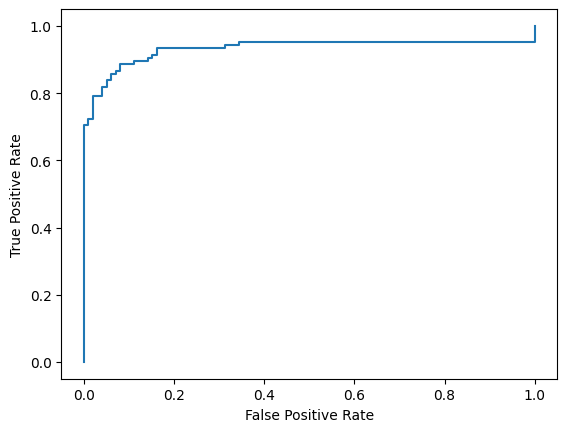

In [ ]:
fpr, tpr, _ = roc_curve(y,  logistic.predict_proba(X)[:,1])

# построение ROC кривой
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()